In [544]:
import pandas as pd
import matplotlib.pyplot as plt

In [545]:
dtypes = {'Lote': str, 'Material': str, 'Lote interno': str, 'Lote Proveedor': str, 'Qty': float, 'Fecha recepción': object, 'Fecha traslado': object}

In [546]:
mc = pd.read_excel('../../data/raw/Movimientos componentes.xlsx', dtype=dtypes)
mc.head()

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
0,23019,100001,0000737133,AM1798471,72.0,2023-01-12 00:00:00,2023-03-22 00:00:00
1,23019,100002,0000676155,K53821835,72.0,2022-03-07 00:00:00,2023-03-15 00:00:00
2,23019,100003,0000636590,0005065337,4800.0,2021-08-27 00:00:00,2023-03-13 00:00:00
3,23019,100004,0000655968,2414150,320.0,2021-11-25 00:00:00,2023-03-10 00:00:00
4,23019,100005,0000723171,M3889,96.0,2022-11-04 00:00:00,2023-03-03 00:00:00


In [547]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lote             5024 non-null   object 
 1   Material         5024 non-null   object 
 2   Lote interno     5024 non-null   object 
 3   Lote Proveedor   5024 non-null   object 
 4   Qty              5024 non-null   float64
 5   Fecha recepción  5024 non-null   object 
 6   Fecha traslado   5024 non-null   object 
dtypes: float64(1), object(6)
memory usage: 274.9+ KB


Fecha recepción y traslado are not datetimes

In [548]:
mc.describe()

,Qty
count,5024.000000
mean,1639.163955
std,2729.803662
min,-8352.000000
25%,67.200000
50%,144.940000
75%,2047.200000
max,9600.000000


It is weird for a quantity to be less than 0 (even 0 is weird!)

In [549]:
# Duplicated rows count
mc.duplicated().sum()

np.int64(104)

In [550]:
# Lets take a look at the duplicated rows how many times they are duplicated
df = mc.copy()
# For each duplicated row we are going to count the number of times the row is duplicated
df['duplicated'] = df.duplicated(keep=False)
# Get those which are duplicated
df = df[df['duplicated']]
print(df[df['duplicated']].shape[0])
# Get the row number 1
#print(df.loc[df['Lote'] == df.iloc[1]['Lote']])
# Count the number of times the row is duplicated using apply, axis = 1

df['duplicated_count'] = df.apply(lambda x: df[df.eq(x).all(1)].shape[0], axis=1)
df = df.drop_duplicates()
df = df.sort_values(by='duplicated_count', ascending=False)
# Sum
df['duplicated_count'].sum()


202


np.int64(202)

In [551]:
df.head(10)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,duplicated,duplicated_count
4874,24097,100004,0000828959,LA-APS-0303,0.0,45404,45443,True,5
3377,24034,100006,0000676218,C4837,177.6,2022-03-07 00:00:00,2024-02-01 00:00:00,True,3
3535,24038,100011,0000804674,0002408591,3200.0,2023-12-19 00:00:00,2024-02-15 00:00:00,True,3
3524,24038,100003,0000677338,0005645346,4800.0,2022-03-11 00:00:00,2024-02-14 00:00:00,True,3
1814,23093,100002,0000764791,K54491535,384.0,2023-05-25 00:00:00,2023-07-07 00:00:00,True,2
2141,23115,100012,0000780017,3178726,7872.0,2023-08-09 00:00:00,2023-10-27 00:00:00,True,2
1088,23066,100002,0000762483,K54491535,384.0,2023-05-16 00:00:00,2023-06-19 00:00:00,True,2
1091,23066,100012,0000769202,3121971,7872.0,2023-06-16 00:00:00,2023-07-05 00:00:00,True,2
2184,23116,100012,0000780017,3178726,7872.0,2023-08-09 00:00:00,2023-10-27 00:00:00,True,2
2355,23122,100012,0000780018,3178726,7872.0,2023-08-09 00:00:00,2023-11-08 00:00:00,True,2


In [552]:
df.tail(10)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,duplicated,duplicated_count
4213,24059,100001,0000804669,100977,72.0,2023-12-19 00:00:00,2024-03-04 00:00:00,True,2
4183,24058,100009,0000820609,0002439101,7680.0,2024-03-11 00:00:00,2024-03-28 00:00:00,True,2
4218,24059,100004,0000738806,2463830,320.0,2023-01-23 00:00:00,2024-03-21 00:00:00,True,2
4221,24059,100007,0000822448,4045286,8352.0,2024-03-19 00:00:00,2024-04-08 00:00:00,True,2
4855,24097,100009,0000827435,0002482368,7680.0,45397,45449,True,2
4846,24097,100011,0000814043,0002408673,3200.0,45329,45446,True,2
4858,24097,100001,0000826820,101372,57.6,45393,45433,True,2
4864,24097,100007,0000828650,4073765,8352.0,45401,45447,True,2
4867,24097,100006,0000819017,C5945,177.6,45352,45442,True,2
4881,24097,100003,0000826477,0007850532,4800.0,45392,45443,True,2


### Is there a pattern in the duplicated rows?

In [553]:
# Drop duplicated rows
mc.drop_duplicates(inplace=True)

# Columns


## Qty 

In [554]:
# Is there any non-alphanumeric character in the 'Qty' column?
print('Number of values with digit characters: ' + str(mc['Qty'].astype(str).str.count('^[-0-9.]+').sum()))
# Which ones are positive?
print('Number of positive values: ' + str(mc[mc['Qty'] > 0]['Qty'].count()))
# Which ones are negative?
print('Number of negative values: ' + str(mc[mc['Qty'] < 0]['Qty'].count()))
# Which ones are zero?
print('Number of zero values: ' + str(mc[mc['Qty'] == 0]['Qty'].count()))

Number of values with digit characters: 4920
Number of positive values: 4905
Number of negative values: 12
Number of zero values: 3


In [555]:
# Lets show the negative values
mc[mc['Qty'] < 0]

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
4845,24097,100012,0000800167,3262705,-7872.0,45254,45405
4847,24097,100011,0000814043,0002408673,-3200.0,45329,45446
4850,24097,100010,0000821622,0002452145,-96.8,45365,45449
4853,24097,100002,0000829314,K55514635,-384.8,45405,45446
4856,24097,100009,0000827435,0002482368,-7680.0,45397,45449
4859,24097,100001,0000826820,101372,-57.6,45393,45433
4862,24097,100008,0000821945,A1682579,-144.8,45366,45442
4865,24097,100007,0000828650,4073765,-8352.0,45401,45447
4868,24097,100006,0000819017,C5945,-177.6,45352,45442
4871,24097,100005,0000723171,M3889,-96.8,44869,45355


In [556]:
# Lets show the zero values
mc[mc['Qty'] == 0]

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
677,23048,100004,0000655974,2414142,0.0,2021-11-25 00:00:00,2023-03-23 00:00:00
2214,23117,100004,0000785548,KA-APS-0306,0.0,2023-09-13 00:00:00,2023-11-06 00:00:00
4874,24097,100004,0000828959,LA-APS-0303,0.0,45404,45443


In [557]:
# Lets show 10 of the positive values
mc[mc['Qty'] > 0].sample(10)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
2137,23115,100002,0000772206,K55094235,380.8000,2023-06-30 00:00:00,2023-10-09 00:00:00
2280,23119,100006,0000773656,C5457,15.6800,2023-07-06 00:00:00,2023-10-09 00:00:00
4650,24094,100002,0000829314,K55514635,384.5200,45405,45446
1792,23092,100013,0000776545,2157422,2046.7200,2023-07-21 00:00:00,2023-09-26 00:00:00
1317,23074,100008,0000761698,A1682479,144.0000,2023-05-11 00:00:00,2023-07-07 00:00:00
351,23034,100009,0000719593,0002231404,7680.0000,2022-10-17 00:00:00,2023-04-18 00:00:00
1855,23094,100002,0000772206,K55094235,384.4560,2023-06-30 00:00:00,2023-10-05 00:00:00
140,23025,100012,0000746149,3009264,7839.8336,2023-02-27 00:00:00,2023-03-24 00:00:00
2769,23135,100005,0000723171,M3889,96.8000,2022-11-04 00:00:00,2023-03-03 00:00:00
646,23047,100002,0000676155,K53821835,72.7200,2022-03-07 00:00:00,2023-04-06 00:00:00


Weird values for recepción y traslado, lets check what else happened with those columns later.

## Lote

In [558]:
### Are all lote chars digits?
mc['Lote'].str.isdigit().all()

np.True_

In [627]:
# Lote max and min length
print('Lote max length: ' + str(mc['Lote'].str.len().max()))
print('Lote min length: ' + str(mc['Lote'].str.len().min()))


Lote max length: 5
Lote min length: 5


In [559]:
#Number of unique lote values
print('Number of unique lote values: ' + str(mc['Lote'].nunique()) + ' out of ' + str(mc['Lote'].count()))

Number of unique lote values: 194 out of 4920


194 unique values != 205 unique from OF 123456 excel sheet.

## Lote proveedor

In [560]:
# Lote proveedor unique values
print('Number of unique lote proveedor values: ' + str(mc['Lote Proveedor'].nunique()) + 
      ' out of ' + str(mc['Lote Proveedor'].count()))

Number of unique lote proveedor values: 118 out of 4920


In [620]:
# Min and max length 
print('Min lote length: ' + str(mc['Lote Proveedor'].str.len().min()))
print('Max lote length: ' + str(mc['Lote Proveedor'].str.len().max()))

Min lote length: 5
Max lote length: 11


<Axes: xlabel='Lote Proveedor'>

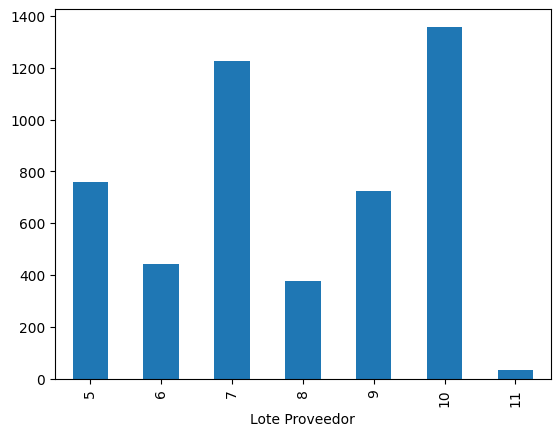

In [626]:
# Distribution of lengths
mc['Lote Proveedor'].str.len().value_counts().sort_index().plot(kind='bar')

In [575]:
# They are not all digits, but they are all alphanumeric
mc['Lote Proveedor'].str.isalnum().all()

np.False_

In [579]:
# Which is not alphanumeric?
mc[~mc['Lote Proveedor'].str.isalnum()]['Lote Proveedor'].unique()

array(['KA-APS-0306', 'KA-APS-0305', 'KA-APS-0304', 'LA-APS-0302',
       'LA-APS-0303'], dtype=object)

There are patterns and groups

In [608]:
# First values of 'Lote Proveedor' patterns
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{1})').value_counts()

0
2    47
0    35
K     9
3     8
A     5
1     4
4     3
C     3
L     2
8     1
M     1
Name: count, dtype: int64

In [595]:
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{2})').value_counts()

0 
00    1357
K5     603
10     442
24     432
A1     376
M3     365
31     293
C5     189
C4     179
22     136
AM     120
32      99
40      77
21      70
30      55
12      40
88      28
KA      23
33      23
LA      12
25       1
Name: count, dtype: int64

In [609]:
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{3})').value_counts()

0  
000    35
246    13
243     9
244     9
241     8
242     5
A16     4
KA-     3
K55     3
407     2
100     2
LA-     2
101     1
311     1
300     1
250     1
220     1
129     1
215     1
327     1
326     1
317     1
315     1
312     1
888     1
404     1
331     1
C54     1
C48     1
AM1     1
C59     1
K54     1
K53     1
K52     1
M38     1
Name: count, dtype: int64

In [610]:
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{4})').value_counts()

0   
0002    27
2463    13
2430     9
2445     9
2414     8
0005     6
2428     5
KA-A     3
A168     3
1009     2
LA-A     2
2157     1
2202     1
1013     1
0007     1
0001     1
1292     1
2505     1
3159     1
3178     1
3262     1
3277     1
3319     1
3009     1
3114     1
3121     1
4073     1
4072     1
4045     1
8884     1
C483     1
C545     1
A167     1
AM17     1
K521     1
C594     1
K538     1
K544     1
K551     1
K550     1
K555     1
M388     1
Name: count, dtype: int64

Could there be any value in splitting the suppliers into several categories for statistical analysis or ML related analysis?

## Lote interno

In [611]:
# lote interno unique values
print('Number of unique lote interno values: ' + str(mc['Lote interno'].nunique()) + 
      ' out of ' + str(mc['Lote interno'].count()))

Number of unique lote interno values: 160 out of 4920


### This looks interesting, one would assume lote interno was an ID for the material transaction but seems it is not true

In [612]:
# Are all lote interno chars digits?
mc['Lote interno'].str.isdigit().all()

np.True_

In [618]:
# Minimum and max length of lote interno
print('Minimum length of lote interno: ' + str(mc['Lote interno'].str.len().min()))
print('Maximum length of lote interno: ' + str(mc['Lote interno'].str.len().max()))

Minimum length of lote interno: 10
Maximum length of lote interno: 10


In [615]:
# Is there any pattern to the unique values?
mc['Lote interno'].value_counts().index.str.extract(r'(^.{5})').value_counts()

0    
00007    90
00008    37
00006    33
Name: count, dtype: int64

In [616]:
mc['Lote interno'].value_counts().index.str.extract(r'(.{6}$)').value_counts()

0     
636590    1
637889    1
644272    1
648033    1
652422    1
         ..
828650    1
828957    1
828959    1
829314    1
837299    1
Name: count, Length: 160, dtype: int64

### This just looks like a numerical id, but we can't know what it is exactly identifying, it is likely a combination of Lote, Lote interno and Material/ proveedor which makes the row identifiable

## Fecha recepcion

In [562]:
# Number of unique values for fecha recepción
print('Number of unique fecha recepción values: ' + str(mc['Fecha recepción'].nunique()) + 
      ' out of ' + str(mc['Fecha recepción'].count()))

Number of unique fecha recepción values: 110 out of 4920


In [563]:
# Are all datetimes? 
# Check with type
import datetime
print('All recepcion datetimes: ' + str(mc['Fecha recepción'].apply(lambda x: type(x)).eq(datetime.datetime).all()))
print('All traslado datetimes: ' + str(mc['Fecha traslado'].apply(lambda x: type(x)).eq(datetime.datetime).all()))
# Get those which are not datetimes
not_dt = mc[~mc['Fecha recepción'].apply(lambda x: type(x)).eq(datetime.datetime)]
print('Number of not datetime values in fecha recepción: ' + str(not_dt.shape[0]))
not_dt = mc[~mc['Fecha traslado'].apply(lambda x: type(x)).eq(datetime.datetime)]
print('Number of not datetime values in fecha traslado: ' + str(not_dt.shape[0]))

not_dt.shape[0]
#nUnique of fecha recepción
print('nUnique of fecha recepción: ' + str(not_dt['Fecha recepción'].nunique()))
# nUnique of Lote
print('nUnique of Lote: ' + str(not_dt['Lote'].nunique()))  
# nUnique of Lote Proveedor
print('nUnique of Lote Proveedor: ' + str(not_dt['Lote Proveedor'].nunique()))
# nUnique of Material
print('nUnique of Material: ' + str(not_dt['Material'].nunique()))
# nUnique of Qty
print('nUnique of Qty: ' + str(not_dt['Qty'].nunique()))
# nUnique of Fecha traslado
print('nUnique of Fecha traslado: ' + str(not_dt['Fecha traslado'].nunique()))
# nUnique of Lote interno
print('nUnique of Lote interno: ' + str(not_dt['Lote interno'].nunique()))
print(not_dt)


All recepcion datetimes: False
All traslado datetimes: False
Number of not datetime values in fecha recepción: 760
Number of not datetime values in fecha traslado: 760
nUnique of fecha recepción: 28
nUnique of Lote: 48
nUnique of Lote Proveedor: 33
nUnique of Material: 12
nUnique of Qty: 292
nUnique of Fecha traslado: 45
nUnique of Lote interno: 40
       Lote Material Lote interno Lote Proveedor     Qty Fecha recepción  \
4254  24060   100012   0000795420        3262705  7872.0           45233   
4255  24060   100011   0000808869     0002408636  3208.0           45307   
4256  24060   100010   0000800462     0002322586    96.0           45257   
4257  24060   100002   0000820714      K55125135   384.0           45362   
4258  24060   100009   0000820609     0002439101  7688.0           45362   
...     ...      ...          ...            ...     ...             ...   
5019  24110   100001   0000826820         101372    72.0           45393   
5020  24109   100002   0000829314      K5

In [564]:
# Are non-datetime values in the fecha traslado greater than fecha recepción?
(not_dt['Fecha traslado'] > not_dt['Fecha recepción']).all()

np.True_

## Duration

In [565]:
def dur_map(x):
    if type(x) == datetime.timedelta:
        # get days as int
        return x.days
    else:
        return x

In [566]:
# Create a column for duration in mc
mc['Duration'] = mc['Fecha traslado'] - mc['Fecha recepción']
mc['Duration'] = mc['Duration'].apply(dur_map)
mc


,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,Duration
0,23019,100001,0000737133,AM1798471,72.0,2023-01-12 00:00:00,2023-03-22 00:00:00,69
1,23019,100002,0000676155,K53821835,72.0,2022-03-07 00:00:00,2023-03-15 00:00:00,373
2,23019,100003,0000636590,0005065337,4800.0,2021-08-27 00:00:00,2023-03-13 00:00:00,563
3,23019,100004,0000655968,2414150,320.0,2021-11-25 00:00:00,2023-03-10 00:00:00,470
4,23019,100005,0000723171,M3889,96.0,2022-11-04 00:00:00,2023-03-03 00:00:00,119
...,...,...,...,...,...,...,...,...
5019,24110,100001,0000826820,101372,72.0,45393,45463,70
5020,24109,100002,0000829314,K55514635,72.0,45405,45453,48
5021,24109,100001,0000826820,101372,72.0,45393,45463,70
5022,24108,100002,0000829314,K55514635,72.0,45405,45453,48


Mean duration: 186.5391826923077
Median duration: 118.0
Std duration: 184.0852090127266


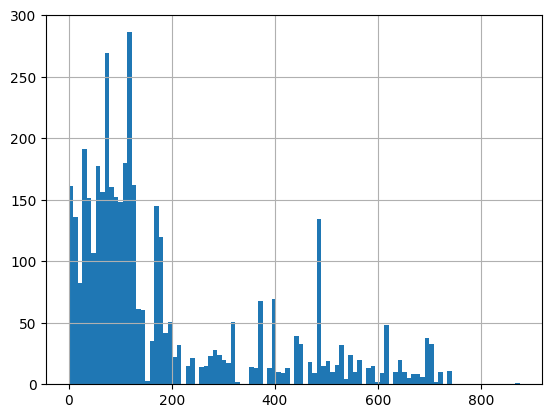

In [567]:
# Plot histogram of duration
mc[~mc.index.isin(not_dt.index)]['Duration'].hist(bins=100)
# Print mean
print('Mean duration: ' + str(mc[~mc.index.isin(not_dt.index)]['Duration'].mean()))
# Print median
print('Median duration: ' + str(mc[~mc.index.isin(not_dt.index)]['Duration'].median()))
# Print std
print('Std duration: ' + str(mc[~mc.index.isin(not_dt.index)]['Duration'].std()))

Mean duration: 120.3171052631579
Median duration: 70.0
Std duration: 146.1362845865765


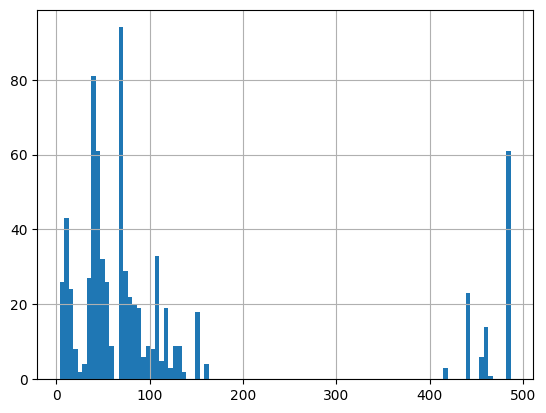

In [568]:
# Plot histogram of duration
mc[mc.index.isin(not_dt.index)]['Duration'].hist(bins=100)
# Print mean
print('Mean duration: ' + str(mc[mc.index.isin(not_dt.index)]['Duration'].mean()))
# Print median
print('Median duration: ' + str(mc[mc.index.isin(not_dt.index)]['Duration'].median()))
# Print std
print('Std duration: ' + str(mc[mc.index.isin(not_dt.index)]['Duration'].std()))

Mean duration: 176.30975609756098
Median duration: 105.0
Std duration: 180.33233304618426


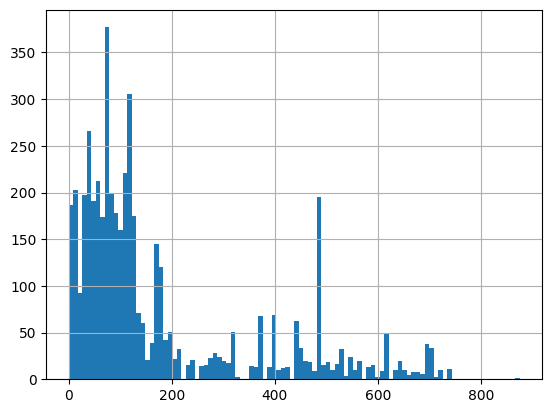

In [569]:
mc['Duration'].hist(bins=100)
# Print mean
print('Mean duration: ' + str(mc['Duration'].mean()))
# Print median
print('Median duration: ' + str(mc['Duration'].median()))
# Print std
print('Std duration: ' + str(mc['Duration'].std()))


## Fecha traslado


In [570]:
# Unique values of Fecha traslado
print('Unique values of Fecha traslado: ' + str(mc['Fecha traslado'].nunique()) + ' out of '
                                                 + str(mc['Fecha traslado'].count()))

Unique values of Fecha traslado: 216 out of 4920


## Material

In [573]:
print(mc['Material'].nunique())
mc['Material'].value_counts()

13


Material
100002    603
100001    590
100004    468
100007    411
100009    389
100011    381
100008    376
100006    368
100010    366
100005    365
100012    326
100003    221
100013     56
Name: count, dtype: int64

<Axes: xlabel='Material'>

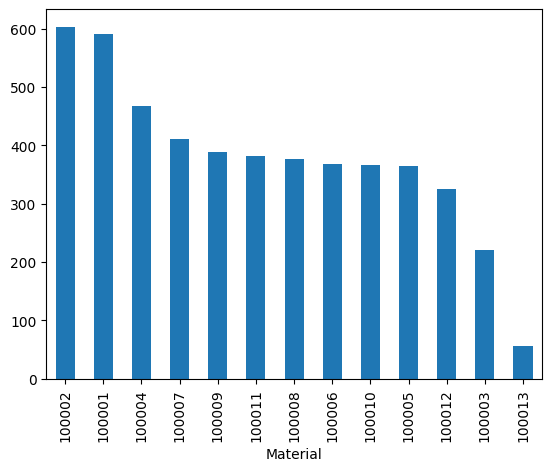

In [574]:
# Plot histogram of Material
mc['Material'].value_counts().plot(kind='bar')

### Note: 100003 and 100013 as the least frequent